In [ ]:
#Shoun Abraham
#Used code fromhttps://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [46]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\Shoun\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [1]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
df = pd.read_csv("German_Credit.csv", index_col = 0)
df.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
1,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
2,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
3,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
4,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
5,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [3]:
df['Class'].replace('Good', 1, inplace = True)
df['Class'].replace('Bad', 0, inplace = True)
df['Class']

1       1
2       0
3       1
4       1
5       0
6       1
7       1
8       1
9       1
10      0
11      0
12      0
13      1
14      0
15      1
16      0
17      1
18      1
19      0
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
30      0
       ..
971     1
972     1
973     0
974     0
975     1
976     1
977     1
978     1
979     0
980     0
981     0
982     0
983     1
984     0
985     1
986     1
987     1
988     1
989     1
990     1
991     1
992     1
993     1
994     1
995     1
996     1
997     1
998     1
999     0
1000    1
Name: Class, Length: 1000, dtype: int64

In [21]:
df2 = df.drop(["Purpose.Vacation"], axis = 1)
df2.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
1,6,1169,4,4,67,2,1,0,1,1,...,0,0,1,0,1,0,0,0,1,0
2,48,5951,2,2,22,1,1,1,1,0,...,0,0,1,0,1,0,0,0,1,0
3,12,2096,2,3,49,1,2,1,1,1,...,0,0,1,0,1,0,0,1,0,0
4,42,7882,2,4,45,1,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0
5,24,4870,3,4,53,2,2,1,1,0,...,0,0,1,0,0,1,0,0,1,0


In [23]:
data_final_vars=df2.columns.values.tolist()
y=['Class']
X=[i for i in data_final_vars if i not in y]
print(y)
print(X)

['Class']
['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration', 'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance', 'Telephone', 'ForeignWorker', 'CheckingAccountStatus.lt.0', 'CheckingAccountStatus.0.to.200', 'CheckingAccountStatus.gt.200', 'CheckingAccountStatus.none', 'CreditHistory.NoCredit.AllPaid', 'CreditHistory.ThisBank.AllPaid', 'CreditHistory.PaidDuly', 'CreditHistory.Delay', 'CreditHistory.Critical', 'Purpose.NewCar', 'Purpose.UsedCar', 'Purpose.Furniture.Equipment', 'Purpose.Radio.Television', 'Purpose.DomesticAppliance', 'Purpose.Repairs', 'Purpose.Education', 'Purpose.Retraining', 'Purpose.Business', 'Purpose.Other', 'SavingsAccountBonds.lt.100', 'SavingsAccountBonds.100.to.500', 'SavingsAccountBonds.500.to.1000', 'SavingsAccountBonds.gt.1000', 'SavingsAccountBonds.Unknown', 'EmploymentDuration.lt.1', 'EmploymentDuration.1.to.4', 'EmploymentDuration.4.to.7', 'EmploymentDuration.gt.7', 'EmploymentDuration.Unemployed', 'Personal.Male.Divorced.Seper

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 10)
rfe = rfe.fit(df2[X], df2['Class'])
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False  True False False  True
  True  True  True False False  True False  True False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False  True False False
 False  True False False False False False False False False False False]
[44 50 25 49 48 30 37 31  1 14 17  1  1  1  1 18 19  1  5  1 23 22 47 13  4
  1 34 21  2 45 27  3 12 35 41 10 20 46 24 36 16 26 51 33 11  1  9 28 29  1
 40 42  6 39  8  7 15 32 38 43]


In [17]:
##############
# OLD ONE !!!!
#############
#last one: Property.CarOther
#Problem Column: Purpose.Vacation
#cols = ["ForeignWorker", "CheckingAccountStatus.0.to.200", "CheckingAccountStatus.gt.200", "CheckingAccountStatus.none", "CreditHistory.NoCredit.AllPaid", 
#       "CreditHistory.Delay", "Purpose.NewCar", "Purpose.Vacation", "OtherDebtorsGuarantors.CoApplicant", "Property.CarOther"]
cols = ["ForeignWorker", "CheckingAccountStatus.0.to.200", "CheckingAccountStatus.gt.200", "CheckingAccountStatus.none", "CreditHistory.NoCredit.AllPaid", 
        "CreditHistory.Delay", "Purpose.NewCar", "OtherDebtorsGuarantors.CoApplicant", "Property.CarOther"]
X = df[cols]
y = df['Class']

In [28]:
##############
# NEW ONE !!!!
#############
#last one: Property.CarOther
#Problem Column: Purpose.Vacation
#cols = ["ForeignWorker", "CheckingAccountStatus.0.to.200", "CheckingAccountStatus.gt.200", "CheckingAccountStatus.none", "CreditHistory.NoCredit.AllPaid", 
#       "CreditHistory.Delay", "Purpose.NewCar", "Purpose.Vacation", "OtherDebtorsGuarantors.CoApplicant", "Property.CarOther"]
cols = ["ForeignWorker", "CheckingAccountStatus.0.to.200", "CheckingAccountStatus.gt.200", "CheckingAccountStatus.none", "CreditHistory.NoCredit.AllPaid", 
        "CreditHistory.Delay", "Purpose.NewCar", "Purpose.Education", "OtherDebtorsGuarantors.CoApplicant", "Property.CarOther"]
X = df2[cols]
y = df2['Class']

In [18]:
###########
# OLD ONE #
###########

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.534729
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            8
Date:                Tue, 01 May 2018   Pseudo R-squ.:                  0.1246
Time:                        00:13:46   Log-Likelihood:                -534.73
converged:                       True   LL-Null:                       -610.86
                                        LLR p-value:                 6.588e-29
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
ForeignWorker                          0.1274      0.139    

In [30]:
###########
# NEW ONE #
###########

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.530621
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      990
Method:                           MLE   Df Model:                            9
Date:                Tue, 01 May 2018   Pseudo R-squ.:                  0.1314
Time:                        00:38:11   Log-Likelihood:                -530.62
converged:                       True   LL-Null:                       -610.86
                                        LLR p-value:                 5.884e-30
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
ForeignWorker                          0.1996      0.142    

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
#Accuracy of train/test split 70/30
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.72


In [40]:
#K Folds Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.727


In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 20  66]
 [ 19 195]]


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.51      0.23      0.32        86
          1       0.75      0.91      0.82       214

avg / total       0.68      0.72      0.68       300



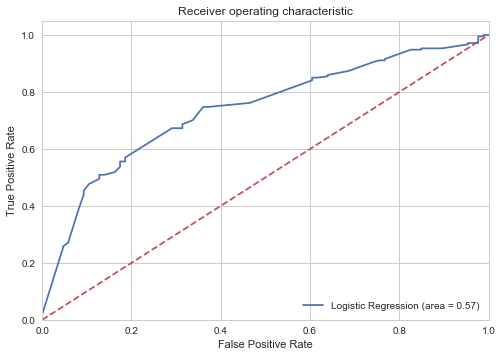

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()